In [1026]:
from mcnptools import Mctal, MctalTally
import numpy as np
import matplotlib.pyplot as plt

In [1027]:
tally_folder = '../gettingtallies/compute/output/mctal/'
si_tally_file = tally_folder+'tnm_si.mctal'
al203_tally_file = tally_folder+'tnm_al203.mctal'

In [1028]:
si_m = Mctal(si_tally_file)
al203_m = Mctal(al203_tally_file)
tfc = MctalTally.TFC

In [1029]:
t6 = si_m.GetTally(6)
u_bins = t6.GetUBins()
print('u_bins', u_bins)
x = t6.GetEBins()
tfcbins = t6.GetTFCBins()
# switch 0s in tfc bins list to -1s
tfcbins = [1 if x == 0 else x for x in tfcbins]
tally_6 = np.zeros(tfcbins)
tfcbins = t6.GetTFCBins()
for u in range(tfcbins[2]):
    for e in range(tfcbins[6]):
        tally_6[0, 0, u, 0, 0, 0, e, 0] = t6.GetValue(tfc, tfc, u, tfc, tfc, tfc, e, tfc)

sitally6 = tally_6

t6 = al203_m.GetTally(6)
u_bins = t6.GetUBins()
print('u_bins', u_bins)
x = t6.GetEBins()
tfcbins = t6.GetTFCBins()
# switch 0s in tfc bins list to -1s
tfcbins = [1 if x == 0 else x for x in tfcbins]
tally_6 = np.zeros(tfcbins)
tfcbins = t6.GetTFCBins()
for u in range(tfcbins[2]):
    for e in range(tfcbins[6]):
        tally_6[0, 0, u, 0, 0, 0, e, 0] = t6.GetValue(tfc, tfc, u, tfc, tfc, tfc, e, tfc)

al203tally6 = tally_6

u_bins (-1.0, 2014000.0, 2006000.0, 2000000.0, 10000000000.0)
u_bins (-1.0, 2014000.0, 2006000.0, 2000000.0, 10000000000.0)


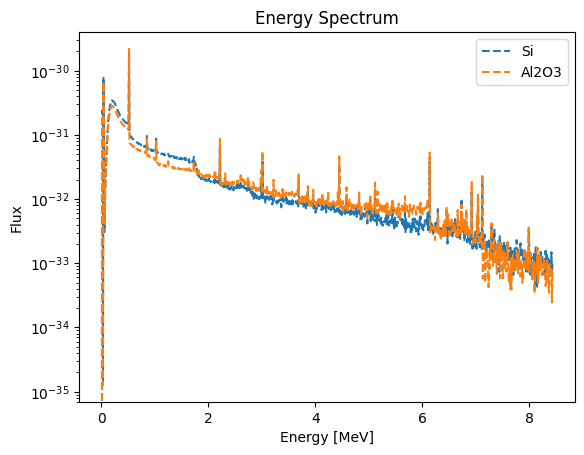

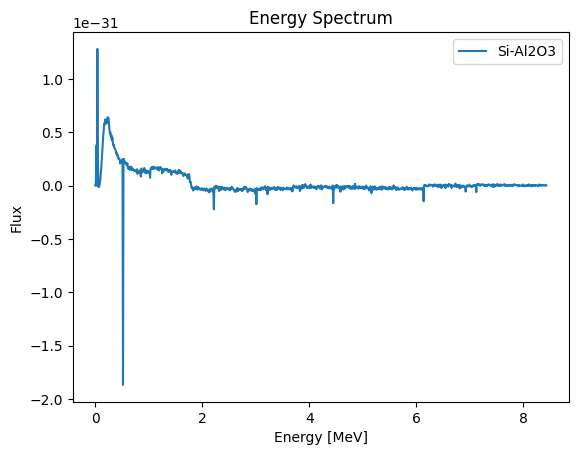

In [1030]:
u = 4
plt.figure()
plt.plot(x, sitally6[0, 0, u, 0, 0, 0, :, 0], label='Si', linestyle='--')
plt.plot(x, al203tally6[0, 0, u, 0, 0, 0, :, 0], label='Al2O3', linestyle='--')
plt.legend()
plt.xlabel('Energy [MeV]')
plt.ylabel('Flux')
plt.yscale('log')
plt.title('Energy Spectrum')
plt.show()

plt.figure()
plt.plot(x, sitally6[0, 0, u, 0, 0, 0, :, 0]-al203tally6[0, 0, u, 0, 0, 0, :, 0], label='Si-Al2O3')
plt.legend()
plt.xlabel('Energy [MeV]')
plt.ylabel('Flux')
plt.title('Energy Spectrum')
plt.show()

In [1031]:
t8 = si_m.GetTally(18)
t8.GetTFCBins()
t8tfcbins = t8.GetTFCBins()
t8tfcbins = [1 if x == 0 else x for x in t8tfcbins]
tally_8 = np.zeros(t8tfcbins)

for e in range(tfcbins[6]):
    tally_8[0, 0, 0, 0, 0, 0, e, 0] = t8.GetValue(tfc, tfc, tfc, tfc, tfc, tfc, e, tfc)

sitally8 = tally_8

t8 = al203_m.GetTally(18)
t8.GetTFCBins()
t8tfcbins = t8.GetTFCBins()
t8tfcbins = [1 if x == 0 else x for x in t8tfcbins]
tally_8 = np.zeros(t8tfcbins)

for e in range(tfcbins[6]):
    tally_8[0, 0, 0, 0, 0, 0, e, 0] = t8.GetValue(tfc, tfc, tfc, tfc, tfc, tfc, e, tfc)

al203tally8 = tally_8

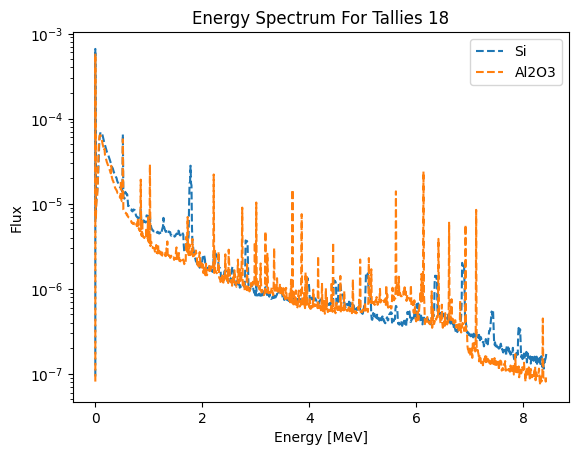

In [1032]:
plt.figure()
plt.plot(x, sitally8[0, 0, 0, 0, 0, 0, :, 0], label='Si', linestyle='--')
plt.plot(x, al203tally8[0, 0, 0, 0, 0, 0, :, 0], label='Al2O3', linestyle='--')
plt.legend()
plt.xlabel('Energy [MeV]')
plt.ylabel('Flux')
plt.yscale('log')
plt.title('Energy Spectrum For Tallies 18')
plt.show()

In [1033]:
si_sum_of_tally6 = np.sum(sitally6[0, 0, :, 0, 0, 0, :, 0], axis=0)
si_t18 = sitally8[0, 0, 0, 0, 0, 0, :, 0]

In [1034]:
al203_sum_of_tally6 = np.sum(al203tally6[0, 0, :, 0, 0, 0, :, 0], axis=0)
al203_t18 = al203tally8[0, 0, 0, 0, 0, 0, :, 0]

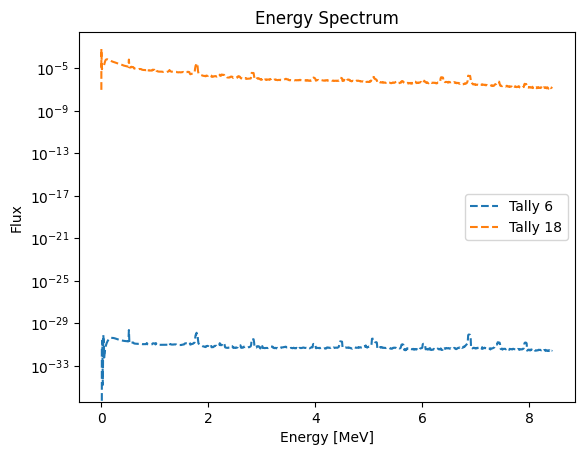

In [1035]:
# tally 6 vs tally 18
plt.figure()
plt.plot(x, si_sum_of_tally6, label='Tally 6', linestyle='--')
plt.plot(x, si_t18, label='Tally 18', linestyle='--')
plt.legend()
plt.xlabel('Energy [MeV]')
plt.ylabel('Flux')
plt.yscale('log')
plt.title('Energy Spectrum')
plt.show()


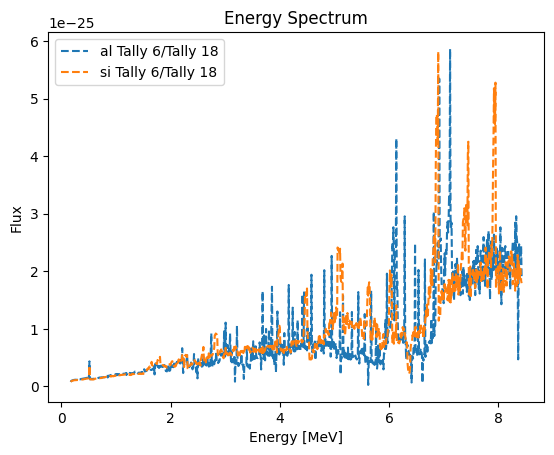

In [1036]:
# tally 6 vs tally 18
plt.figure()
plt.plot(x[20:], (al203_sum_of_tally6/al203_t18)[20:], label='al Tally 6/Tally 18', linestyle='--')
plt.plot(x[20:], (si_sum_of_tally6/si_t18)[20:], label='si Tally 6/Tally 18', linestyle='--')
plt.legend()
plt.xlabel('Energy [MeV]')
plt.ylabel('Flux')
# plt.yscale('log')
plt.title('Energy Spectrum')
plt.show()


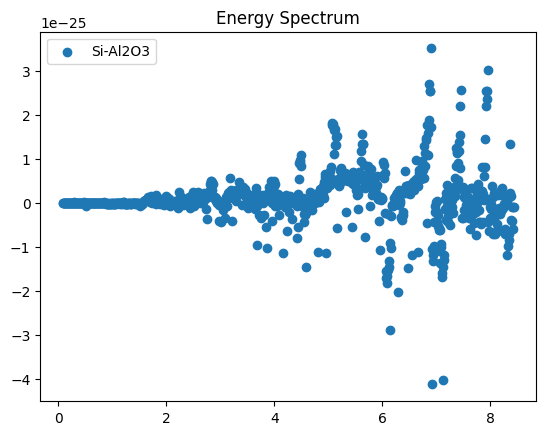

In [1037]:

plt.figure()
plt.scatter(x[10:], ((si_sum_of_tally6/si_t18)-(al203_sum_of_tally6/al203_t18))[10:], label='Si-Al2O3')
plt.legend()
# plt.xlabel('Energy [MeV]')
# plt.ylabel('Flux')
# plt.yscale('log')
plt.title('Energy Spectrum')
plt.show()

In [1038]:
si_t18/si_sum_of_tally6
al203_t18/al203_sum_of_tally6

/tmp/ipykernel_390938/1697617006.py:1: RuntimeWarning: divide by zero encountered in divide
  si_t18/si_sum_of_tally6
/tmp/ipykernel_390938/1697617006.py:2: RuntimeWarning: divide by zero encountered in divide
  al203_t18/al203_sum_of_tally6


array([           inf,            inf, 2.67481626e+26, 4.79915329e+25,
       8.88960432e+29, 1.87486945e+25, 1.02698733e+26, 2.38870892e+27,
       1.43516103e+27, 1.06218204e+27, 8.19907609e+26, 6.47382232e+26,
       5.07755705e+26, 3.93299498e+26, 3.10105980e+26, 2.52308007e+26,
       2.07545793e+26, 1.77661422e+26, 1.56384850e+26, 1.38155157e+26,
       1.29047173e+26, 1.05537261e+26, 1.00056097e+26, 9.58458405e+25,
       9.36542008e+25, 9.09860479e+25, 8.89332695e+25, 8.78055964e+25,
       8.82638780e+25, 8.58490093e+25, 8.62066370e+25, 8.52015359e+25,
       8.74798923e+25, 8.57587396e+25, 9.92008376e+25, 8.39263722e+25,
       8.40573275e+25, 8.24185239e+25, 8.19543410e+25, 8.19828800e+25,
       7.91081725e+25, 7.77285624e+25, 7.61610720e+25, 7.57977176e+25,
       7.50456140e+25, 7.48100203e+25, 7.35245942e+25, 7.26973702e+25,
       7.27613660e+25, 7.10795497e+25, 7.00611076e+25, 6.92851024e+25,
       6.74656878e+25, 6.75139900e+25, 8.66240405e+25, 6.57437093e+25,
      

In [1039]:
import tensorflow as tf

In [1040]:
x_train = tf.constant(si_sum_of_tally6, dtype=tf.float64)
x_train = x_train[30:, tf.newaxis]
y_train = tf.constant(si_t18, dtype=tf.float64)
y_train = y_train[30:, tf.newaxis]
x_bins = x[30:]

In [1041]:
x_train.shape[0]

905

In [1042]:
n = x_train.shape[0]

In [1043]:
def gaussian_kernel(amp, x1, x2, sigma):
    return amp*tf.exp(-tf.math.square(x1 - x2) / (2 * tf.cast(tf.math.square(sigma), tf.float64)))

In [1044]:
def exp_fall_kernel(amp, x1, x2, sigma):
    return amp*tf.exp(-tf.abs(x1 - x2) / tf.cast(tf.abs(sigma), tf.float64))

In [1045]:
a0 = tf.constant(np.arange(n), dtype=tf.float64)

In [1046]:
# def funct(_x, geb):
#     a = gaussian_kernel(geb[0], 0, tf.constant(np.arange(n), dtype=tf.float64), geb[1])
#     __A = [tf.linalg.diag(tf.ones((n-i), dtype=tf.float64)*a[i],name='diag',k=i,num_rows=n,num_cols=n,padding_value=0,align='RIGHT_LEFT') for i in range(n)]
#     __A = tf.reduce_sum(__A, axis=0)
#     return tf.matmul(__A, _x)

In [1047]:
# def funct(_x, gebb):
#     a = gaussian_kernel(gebb[0], 0, tf.constant(np.arange(n), dtype=tf.float64), gebb[1])
#     a = tf.reshape(a, (n, 1))
#     return (gebb[2]*_x)+a

In [1048]:
def funct(_x, gebb):
    a = exp_fall_kernel(gebb[0], 0, tf.constant(np.arange(n), dtype=tf.float64), gebb[1])
    a = tf.reshape(a, (n, 1))
    return _x*a

In [1049]:
funct(x_train, [1.0, 1.0])

<tf.Tensor: shape=(905, 1), dtype=float64, numpy=
array([[3.74358600e-031],
       [1.31980539e-031],
       [4.66360785e-032],
       [1.64884813e-032],
       [5.89223993e-033],
       [2.08054058e-033],
       [7.44690773e-034],
       [2.62941712e-034],
       [9.39943136e-035],
       [3.37596281e-035],
       [1.19658824e-035],
       [4.37062800e-036],
       [1.58773022e-036],
       [5.65686312e-037],
       [2.04968420e-037],
       [7.34317297e-038],
       [2.61782587e-038],
       [9.43689281e-039],
       [3.42339637e-039],
       [1.24346111e-039],
       [4.48892670e-040],
       [1.63840781e-040],
       [5.89207351e-041],
       [2.17031571e-041],
       [7.91971131e-042],
       [2.83407937e-042],
       [1.04796663e-042],
       [3.79687187e-043],
       [1.62969866e-042],
       [3.76044083e-044],
       [1.36651801e-044],
       [4.89486164e-045],
       [1.84418491e-045],
       [7.57499014e-046],
       [2.76874366e-046],
       [9.91882507e-047],
       [3.5907

In [1050]:
x_train[-1]

<tf.Tensor: shape=(1,), dtype=float64, numpy=array([3.0671368e-32])>

In [1051]:
def loss_fn(geb):
    return tf.reduce_sum(tf.square(y_train- funct(x_train, geb)))

In [1052]:
def optimize(a_0):
    optimizer = tf.optimizers.Adam(learning_rate=.2)

    steps = 2000
    steps_per_epoch = 100
    total_epochs = steps // steps_per_epoch
    epoch = 0
    for i in range(steps):
        with tf.GradientTape() as tape:
            loss = loss_fn(a_0)
            grads = tape.gradient(loss, a_0)
        optimizer.apply_gradients([(grads, a_0)])
        if i % steps_per_epoch == 0:
            print(f'loss: {loss}', f'epoch: {epoch+1}/{total_epochs}')
            epoch += 1

    return a_0.numpy()

In [1053]:
# gebb0 = tf.Variable([1, 5, 1, (y_train[-1]/x_train[-1]).numpy()[0]], dtype=tf.float64)
# gebb0 = tf.Variable([1e2, 5, (y_train[-1]/x_train[-1]).numpy()[0]], dtype=tf.float64)
gebb0 = tf.Variable([(y_train[0]/x_train[0]).numpy()[0], 2.5e2], dtype=tf.float64)
loss_fn(gebb0)

<tf.Tensor: shape=(), dtype=float64, numpy=1.956650554591399e-08>

In [1054]:
# geb0 = tf.Variable([(y_train[-1]/x_train[-1]).numpy()[0],1.76714191], dtype=tf.float64)
# loss_fn(geb0)

In [1055]:
# a0 = tf.Variable([1]+[0]*(n-1), dtype=tf.float64)
optimize(gebb0)

loss: 1.956650554591399e-08 epoch: 1/20
loss: 1.956634433408134e-08 epoch: 2/20
loss: 1.9566057821116085e-08 epoch: 3/20
loss: 1.956569582891717e-08 epoch: 4/20
loss: 1.956527731078024e-08 epoch: 5/20
loss: 1.9564813604449583e-08 epoch: 6/20
loss: 1.95643125334518e-08 epoch: 7/20
loss: 1.95637799189352e-08 epoch: 8/20
loss: 1.9563220298569653e-08 epoch: 9/20
loss: 1.9562637322374726e-08 epoch: 10/20
loss: 1.956203399299399e-08 epoch: 11/20
loss: 1.956141282214511e-08 epoch: 12/20
loss: 1.9560775938036347e-08 epoch: 13/20
loss: 1.95601251622414e-08 epoch: 14/20
loss: 1.955946206657848e-08 epoch: 15/20
loss: 1.9558788016356744e-08 epoch: 16/20
loss: 1.955810420400947e-08 epoch: 17/20
loss: 1.9557411675753022e-08 epoch: 18/20
loss: 1.9556711353061383e-08 epoch: 19/20
loss: 1.955600405020501e-08 epoch: 20/20


array([9.11719405e+25, 2.49819339e+02])

In [1056]:
funct(x_train, gebb0).shape

TensorShape([905, 1])

In [1057]:
y_fit = funct(x_train, gebb0).numpy().flatten()

tf.Variable([1e2, 5, (y_train[-1]/x_train[-1]).numpy()[0]], dtype=tf.float64)

<tf.Variable 'Variable:0' shape=(3,) dtype=float64, numpy=array([1.00000000e+02, 5.00000000e+00, 5.57523225e+24])>

/tmp/ipykernel_390938/2274426722.py:8: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 1.1*max(y_train.numpy()[500:].flatten()))


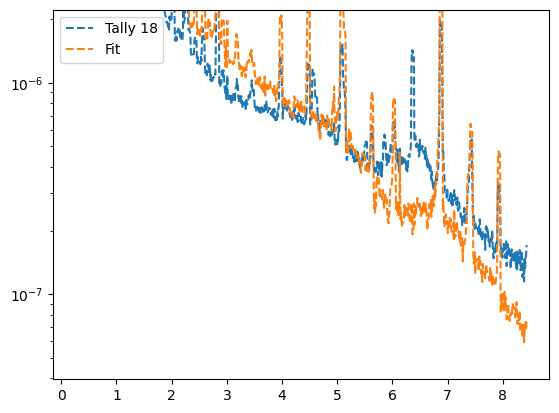

In [1064]:
plt.figure()
plt.plot(x_bins, y_train, label='Tally 18', linestyle='--')
plt.plot(x_bins, y_fit, label='Fit', linestyle='--')
# plt.plot(x_bins, funct(x_train, tf.Variable([(y_train[0]/x_train[0]).numpy()[0], 2.5e2, 0], dtype=tf.float64)).numpy().flatten(), label='Fit', linestyle='--')

# plt.plot(x_bins, x_train)
plt.yscale('log')
plt.ylim(0, 1.1*max(y_train.numpy()[500:].flatten()))
plt.legend()